# DEEP SEA CORALS PROJECT
***

# Goal
***

The goal of this project is to draw insights about various coral in addition to the facilities and methods used to observe them.

# Acquire
Acquiring the data from local csv file
***

In [1]:
# establishing environment
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from shapely.geometry import Point, Polygon
from prepare import prep_corals
from wrangle import wrangle_corals

In [2]:
# importing data
df = pd.read_csv('deep_sea_corals.csv')

In [3]:
# previewing data
df.head()

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28
2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53
3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09
4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50


## Acquire Takeaway
- Acquired data from local csv file 

# Prepare
Preparing the data for exploration using the __prep_corals__ function __(prepare.py)__
***

In [4]:
df = prep_corals(df)

df.head()

,data_provider,scientific_name,vernacular_name_category,taxon_rank,observation_date,latitude,longitude,depth_meters,depth_method,location_accuracy,repository,identification_qualifier,sampling_equipment,record_type
1,"noaa, deep sea coral research & technology pro...",madrepora oculata,stony coral (branching),species,2015-09-02,18.30817,-158.45392,959.0,reported,50m,university of hawaii,id by expert from video,rov,video observation
2,"noaa, deep sea coral research & technology pro...",madrepora oculata,stony coral (branching),species,2015-09-01,18.30864,-158.45393,953.0,reported,50m,university of hawaii,id by expert from video,rov,video observation
3,"noaa, deep sea coral research & technology pro...",madrepora oculata,stony coral (branching),species,2015-09-01,18.30877,-158.45384,955.0,reported,50m,university of hawaii,id by expert from video,rov,video observation
4,"noaa, deep sea coral research & technology pro...",madrepora oculata,stony coral (branching),species,2015-09-01,18.30875,-158.45384,955.0,reported,50m,university of hawaii,id by expert from video,rov,video observation
5,"noaa, deep sea coral research & technology pro...",madrepora oculata,stony coral (branching),species,2015-09-01,18.30902,-158.45425,968.0,reported,50m,university of hawaii,id by expert from video,rov,video observation


The __prep_corals__ function (__prepare.py__) prepares the data with the following changes

- Drop columns that will not be used in this iteration of the project
    - CatalogNumber, SampleID, SurveyID, EventID, and Station
        - Categorical columns with vast amounts of unique values that don't offer insight to anything within the scope of this project
    - Locality
        - Column holds a very large amount of categorical values
        - Will be easier to work with if I bin the values as many appear to be near eachother but I'll save this for a later iteration of the project since it may take a significant amount of time

     
     
- Many null values
    - I'll drop them after dropping columns I don't plan to use for this first iteration of this project
        - If too many rows are lost I'll impute values to preserve more rows 


- Convert ObservationDate column to datetime 
        
        
- Other data types look okay for now but I'll update if needed to facilitate operations



- Rename columns 
    - all lowercase
    - "_" between words in names


- Make all values lowercase where applicable


- While exploring the data, I found the following
    - DepthInMeters has a negative value in 23 rows
        - All had a value of -999
        - I'm not certain but I suspect that this value was used instead of null
        - I'm going to drop these rows as well
    - There are rows that contain data about sponges and other non-coral creatures
        - Removing all non-coral creatures from data

## Prepare Takeaways
- Prepared data with changes outlined above using the __prep_corals__ function from the __prepare.py__ file
- Alternatively, the data can be acquired and prepped with a single function, __wrangle_corals__ from the __wrangle.py__ file

# Explore
Exploring the data to draw insights about the corals and the means by which the information about them was gathered.
***

In [5]:
# creating function that converts latitude and longitude values into points for geopandas map
def df_to_gdf(df):
    coordinates = df[['latitude', 'longitude']].astype(float).values
    coordinates = pd.DataFrame(data = coordinates)
    coordinates.columns = ['latitude', 'longitude']
    coordinates = [Point(xy) for xy in zip(coordinates.longitude, coordinates.latitude)]
    geo_df = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=coordinates)
    return geo_df

## Q1. What parts of the world do these observations come from?

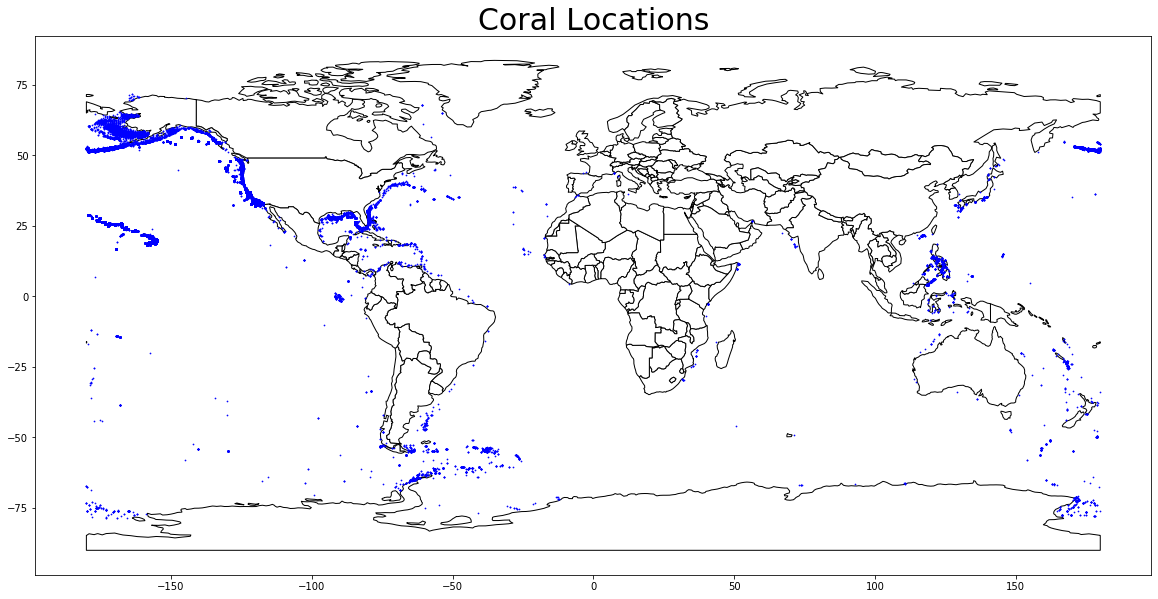

In [6]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (20,25))

# creating dataframe for geoplot
coral_data = df_to_gdf(df)

# plotting map
coral_data.plot(ax = base, marker = 'o', color = 'blue', markersize=0.5)

plt.title('Coral Locations', fontsize=30)
plt.show()

- <span style="color:earth blue">Observations come from clusters around the world, most notably</span>
    - <span style="color:earth blue">Southwest of Alaska</span>
    - <span style="color:earth blue">East/Southeast of the U.S.</span>
    - <span style="color:earth blue">South of Brasil</span>
    - <span style="color:earth blue">Southeast of China</span>
    - <span style="color:earth blue">Southeast of Australia</span>

## Q2. What are the top 5 sources of this data?

In [7]:
top_sources = pd.DataFrame(df.data_provider.value_counts()).head()

top_sources['perc'] = round(top_sources / len(df), 2) * 100

top_sources.columns = ['Count of Observations', 'Percent of Total Observations']

top_sources

,Count of Observations,Percent of Total Observations
monterey bay aquarium research institute,73278,31.0
"noaa, alaska fisheries science center",31678,13.0
hawaii undersea research laboratory,30439,13.0
"noaa, olympic coast national marine sanctuary",22442,9.0
"noaa, southwest fisheries science center, santa cruz",21091,9.0


### Q2. Visualization of top 5 data sources

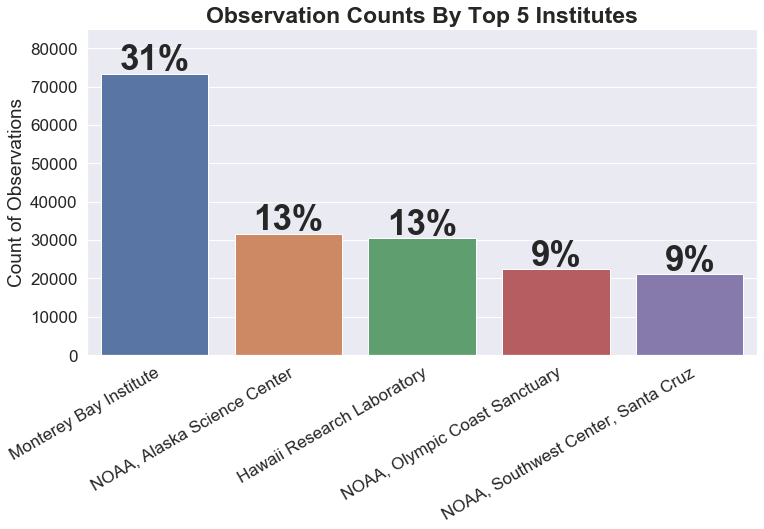

In [8]:
# copying df to avoid altering original
top_sources_copy = top_sources.copy()

# changing index values
top_sources_copy.index = ['Monterey Bay Institute', 'NOAA, Alaska Science Center', 'Hawaii Research Laboratory',
       'NOAA, Olympic Coast Sanctuary', 'NOAA, Southwest Center, Santa Cruz']

# setting figure and text size for all plots that don't have a specified figure size
sns.set(rc = {'figure.figsize':(12,6)})
sns.set(font_scale = 1.25)

# creating plot
ax = sns.barplot(data = top_sources_copy, x = top_sources_copy.index, y = top_sources_copy['Count of Observations'])
plt.title("Observation Counts By Top 5 Institutes", fontweight='bold', fontsize=23)
plt.xticks(rotation = 30, ha = "right", rotation_mode = 'anchor', fontsize = 17)
plt.ylabel('Count of Observations', fontsize = 19)
plt.yticks(fontsize = 17)
plt.ylim(0, 85000)

# adding % value to middle of each column
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1000, '{0:.0%}'.format((height / total)), fontsize=35, weight='bold', ha = "center") 

# displaying plot
plt.show()

- The top 3 providers are
    - Monterey Bay Aquarium Research Institute (31%)
    - NOAA alaska fisheries science center (13%)
    - Hawaii undersea research laboratory (13%)
    

- NOAA has multiple facilities so I'd like to find what percent of observations come from all NOAA's facilities combined

### Q2. Calculating percent of overall data that each of NOAA's facilities contribute

In [9]:
# creating DF of NOAA facility observations
noaa_facil = pd.DataFrame(df[df.data_provider.str.contains('noaa')].data_provider.value_counts())

# calculating percent of data that each NOAA facility contributed to whole dataset
noaa_facil['perc'] = round(noaa_facil / len(df), 2) * 100

# renaming columns
noaa_facil.columns = ['Count of Observations', 'Percent of Total Observations']

# shortening very long index value
noaa_facil.index.values[4] = 'noaa, office of ocean exploration and research'

noaa_facil

,Count of Observations,Percent of Total Observations
"noaa, alaska fisheries science center",31678,13.0
"noaa, olympic coast national marine sanctuary",22442,9.0
"noaa, southwest fisheries science center, santa cruz",21091,9.0
"noaa, office of ocean exploration and research",11415,5.0
"noaa, office of ocean exploration and research",5138,2.0
"noaa, flower garden banks national marine sanctuary",4027,2.0
"noaa, southwest fisheries science center, la jolla",3810,2.0
"noaa, channel islands national marine sanctuary",2742,1.0
"noaa, office of response and restoration",1923,1.0
"noaa, northwest fisheries science center",1530,1.0


### Q2. Visualization of NOAA observations (percents represent percent of  whole dataset)

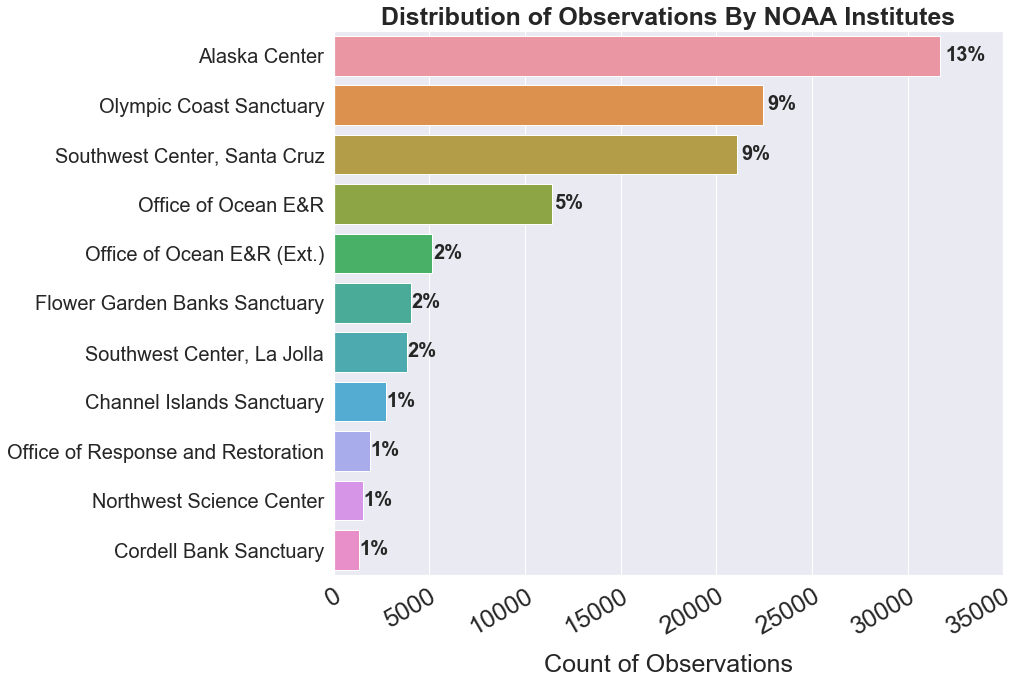

In [10]:
# copying df to avoid altering original
noaa_facil_copy = noaa_facil.copy()

# shortening index values
noaa_facil_copy.index = ['Alaska Center', 'Olympic Coast Sanctuary', 'Southwest Center, Santa Cruz', 
                         'Office of Ocean E&R', 'Office of Ocean E&R (Ext.)',
                         'Flower Garden Banks Sanctuary', 'Southwest Center, La Jolla', 'Channel Islands Sanctuary', 
                         'Office of Response and Restoration', 'Northwest Science Center', 'Cordell Bank Sanctuary']

# setting figure and text size for all plots that don't have a specified figure size
sns.set(rc = {'figure.figsize':(12,10)})

# creating plot
ax = sns.barplot(data = noaa_facil_copy, y = noaa_facil_copy.index, x = noaa_facil_copy['Count of Observations'])
plt.title("Distribution of Observations By NOAA Institutes", fontweight='bold', fontsize = 25)
plt.xticks(rotation = 30, ha = "right", rotation_mode = 'anchor', fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlabel('Count of Observations', fontsize = 25, labelpad = 15)
plt.xlim(0,35000)

# adding % value to middle of each column
total = len(df)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    ax.text(p.get_width() * 1.01,
            p.get_y() + .5,
            '{0:.0%}'.format((width / total)), fontsize = 20, weight='bold') 

# displaying plot
plt.show()

In [11]:
print('Total % of observations from NOAA:',noaa_facil['Percent of Total Observations'].sum())

Total % of observations from NOAA: 46.0


- Approximately 46% of the data comes from NOAA facilities


## Q3. What areas does each facility get their observations from?

### Q3. Creating map that reflects where different facilities collect their data from

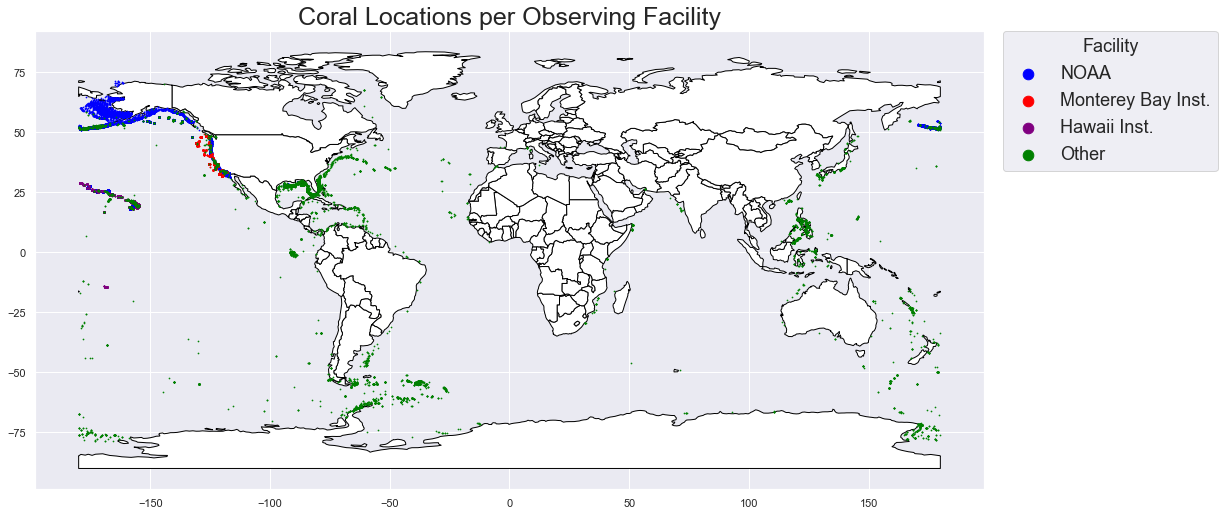

In [54]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (17, 20))

# separating rows by data provider
noaa_data = df[df.data_provider.str.contains('noaa')]
mbari_data = df[df.data_provider == 'monterey bay aquarium research institute']
hurl_data = df[df.data_provider == 'hawaii undersea research laboratory']
alt_data = df[
    (df.data_provider != 'hawaii undersea research laboratory') & 
    (df.data_provider != 'monterey bay aquarium research institute') &
    (df.data_provider.str.contains('noaa') == False)
             ]

# creating dataframe for geoplot
noaa_data = df_to_gdf(noaa_data)
mbari_data = df_to_gdf(mbari_data)
hurl_data = df_to_gdf(hurl_data)
alt_data = df_to_gdf(alt_data)

# plotting
noaa_data.plot(ax = base, marker = 'o', color = 'blue', markersize=0.5)
mbari_data.plot(ax = base, marker = 'o', color = 'red', markersize=0.5)
hurl_data.plot(ax = base, marker = 'o', color = 'purple', markersize=0.5)
alt_data.plot(ax = base, marker = 'o', color = 'green', markersize=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labels=['NOAA', 'Monterey Bay Inst.', 'Hawaii Inst.', 'Other'], prop={'size': 18}, markerscale = 15, title = 'Facility', title_fontsize = 18)

plt.title('Coral Locations per Observing Facility', fontsize=25)
plt.show()

- <span style="color:blue">NOAA's observations are all near Alaska</span>
- <span style="color:red">The Monterey Bay Institute observations are all west of the U.S.</span>
- <span style="color:purple">The Hawaiian Lab's are unsurprisingly, near Hawaii</span>
- <span style="color:green">The other facilities' observations are scattered around the world, namely
    - East/Southeast of the U.S.
    - Southof Brasil
    - Southeast of China</span>

## Q4. What range of dates do the observations cover?

In [13]:
first_date = df.observation_date.min()

last_date = df.observation_date.max()

print(f'The dates of the observations range from {first_date} to {last_date}.')

The dates of the observations range from 1868-05-04 00:00:00 to 2016-03-27 00:00:00.


## Q5. What areas was data collected from in different time periods?

### Q5. Creating map that reflects areas that data was collected from during various time periods

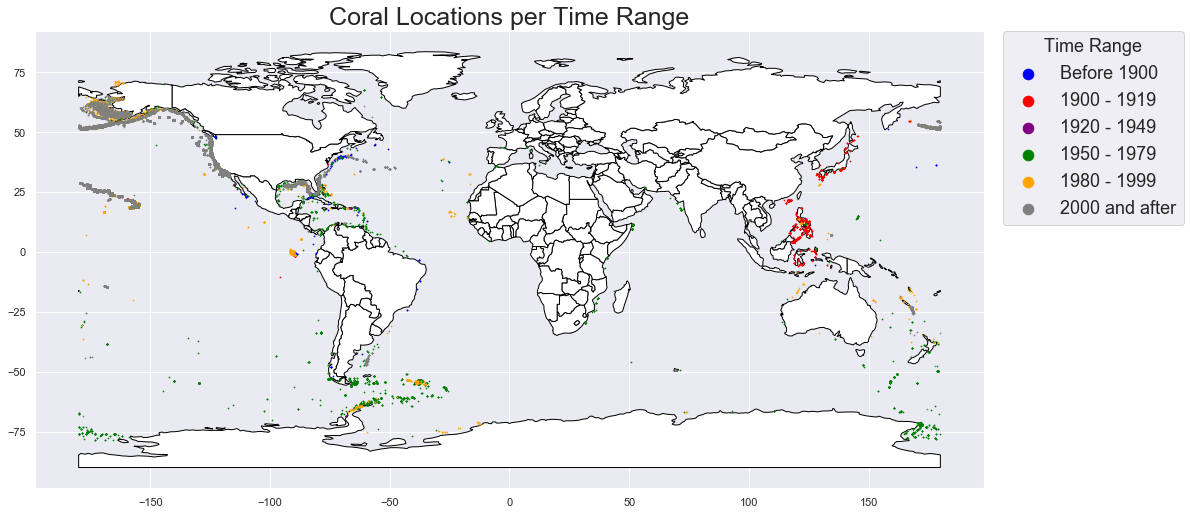

In [55]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (17, 20))

# separating rows by data provider
year_prior_1900 = df[df.observation_date < "1900-01-01"]
year_1900_to_1919 = df[(df.observation_date >= "1900-01-01") & (df.observation_date < "1920-01-01")]
year_1920_to_1949 = df[(df.observation_date >= "1920-01-01") & (df.observation_date < "1950-01-01")]
year_1950_to_1979  = df[(df.observation_date >= "1950-01-01") & (df.observation_date < "1980-01-01")]
year_1980_to_1999  = df[(df.observation_date >= "1980-01-01") & (df.observation_date < "2000-01-01")]
year_2000_and_after = df[(df.observation_date >= "2000-01-01")]

# creating dataframe for geoplot
year_prior_1900 = df_to_gdf(year_prior_1900)
year_1900_to_1919 = df_to_gdf(year_1900_to_1919)
year_1920_to_1949 = df_to_gdf(year_1920_to_1949)
year_1950_to_1979  = df_to_gdf(year_1950_to_1979)
year_1980_to_1999 = df_to_gdf(year_1980_to_1999)
year_2000_and_after = df_to_gdf(year_2000_and_after)

# plotting
year_prior_1900.plot(ax = base, marker = 'o', color = 'blue', markersize=0.5)
year_1900_to_1919.plot(ax = base, marker = 'o', color = 'red', markersize=0.5)
year_1920_to_1949.plot(ax = base, marker = 'o', color = 'purple', markersize=0.5)
year_1950_to_1979.plot(ax = base, marker = 'o', color = 'green', markersize=0.5)
year_1980_to_1999.plot(ax = base, marker = 'o', color = 'orange', markersize=0.5)
year_2000_and_after.plot(ax = base, marker = 'o', color = 'gray', markersize=0.5)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labels=['Before 1900', '1900 - 1919', '1920 - 1949', '1950 - 1979', '1980 - 1999', '2000 and after'], 
           prop={'size': 18}, markerscale = 15, title = 'Time Range', title_fontsize = 18)
plt.title('Coral Locations per Time Range', fontsize = 25)
plt.show()

- <span style="color:blue">Observations from prior to 1900 are few and mostly to east of the U.S.</span>
- <span style="color:red">Observations from 1900 - 1919 are mostly from east and southeast of China</span>
- <span style="color:purple">Observations from 1920 - 1949 are almost non-existent except for a few north of Brasil</span>
- <span style="color:green">Observations from 1950 - 1979 are mostly</span>
    - <span style="color:green">Between Brasil and the U.S.</span>
    - <span style="color:green">South of Brasil</span>
    - <span style="color:green">Southeast of Australia</span>
- <span style="color:orange">Observations from 1980 - 1999 are sprinkled around Alaska, Brasil, Australia</span>
- <span style="color:gray">Observations from 2000 and beyond are clustered</span>
    - <span style="color:gray">Southwest of Alaska</span>
    - <span style="color:gray">West and southeast of the U.S.</span>
    - <span style="color:gray">Southeast of Brasil</span>
    - <span style="color:gray">East of Australia</span>

## Q6. What are the shallowest and deepest depths within the data?

In [15]:
least_deep = df.depth_meters.min()
most_deep = df.depth_meters.max()

print(f'The most shallow observation(s) had a depth of {least_deep}, and the deepest observation(s) had a depth of {most_deep}.')

The most shallow observation(s) had a depth of 0.0, and the deepest observation(s) had a depth of 5303.0.


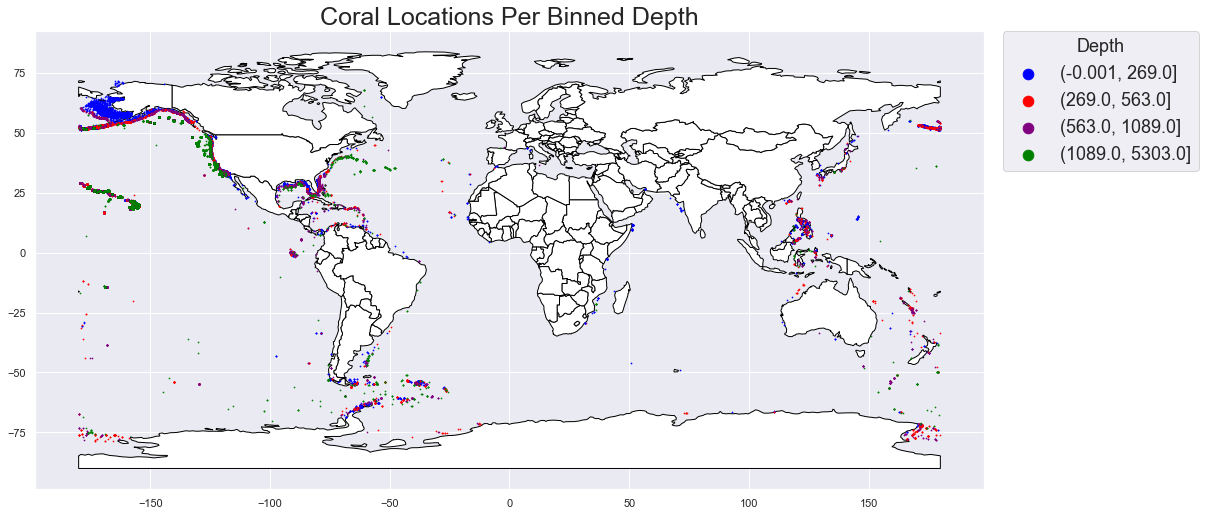

In [51]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (17, 20))

# copying original df to avoid altering it
depth_copy = df.copy()

# binning depth values by quartile
depth_copy['depth_bin'] = pd.qcut(df['depth_meters'], q=4)

depth_sort = sorted(depth_copy.depth_bin.unique())

# separating rows by data provider
bin_a = depth_copy[depth_copy.depth_bin == depth_sort[0]]
bin_b = depth_copy[depth_copy.depth_bin == depth_sort[1]]
bin_c = depth_copy[depth_copy.depth_bin == depth_sort[2]]
bin_d = depth_copy[depth_copy.depth_bin == depth_sort[3]]

# creating dataframe for geoplot
bin_a = df_to_gdf(bin_a)
bin_b = df_to_gdf(bin_b)
bin_c = df_to_gdf(bin_c)
bin_d = df_to_gdf(bin_d)

# plotting
bin_a.plot(ax = base, marker = 'o', color = 'blue', markersize = 0.5)
bin_b.plot(ax = base, marker = 'o', color = 'red', markersize = 0.5)
bin_c.plot(ax = base, marker = 'o', color = 'purple', markersize = 0.5)
bin_d.plot(ax = base, marker = 'o', color = 'green', markersize = 0.5)

plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0., labels = [x for x in depth_sort], markerscale = 15, title = 'Depth', prop = {'size': 18}, title_fontsize = 18)
plt.title('Coral Locations Per Binned Depth', fontsize = 25)
plt.show()

- <span style="color:blue">Shallowest coral (-.001m to 269m) were mainly found</span>
    - <span style="color:blue"> Southwest of Alaska</span>
    - <span style="color:blue"> Around the southeast coast of the U.S.</span>
    - <span style="color:blue"> South of Brasil</span>
    - <span style="color:blue"> Southeast of China</span>
    - <span style="color:blue"> East of Russia</span>

- <span style="color:red">Third deepest set of coral (269m to 563m) are scattered around the map with the largest cluster being near Antartica</span>

- <span style="color:purple">Second deepest set of coral (563m to 1089m) are also scattered around the map with no discernablely larger clusters in any particular areas</span>

- <span style="color:green">Deepest set of coral (1089m to 5303m) were mainly found</span>
    - <span style="color:green">To the east and west of the U.S.</span>
    - <span style="color:green">Around Hawaii</span>

## Q7. How many different types of corals are represented in data? (vernacular name)

In [19]:
vernac_count = pd.DataFrame(df.vernacular_name_category.value_counts())

print(f'There are {len(vernac_count)} different types of corals in the data.')

There are 10 different types of corals in the data.


## Q8. What are the most common types of corals in the data?

In [20]:
vernac_count['perc'] = round(vernac_count / len(df),2) * 100

vernac_count.columns = ['Count of Observations', 'Percent of Total Observations']

vernac_count                

,Count of Observations,Percent of Total Observations
gorgonian coral,132830,56.0
soft coral,37769,16.0
black coral,21481,9.0
lace coral,19496,8.0
stony coral (branching),12627,5.0
stony coral (cup coral),5599,2.0
stony coral (unspecified),3979,2.0
gold coral,2599,1.0
stoloniferan coral,854,0.0
lithotelestid coral,1,0.0


### Q9. Creating a visualization to identify the most common types of corral in the data.

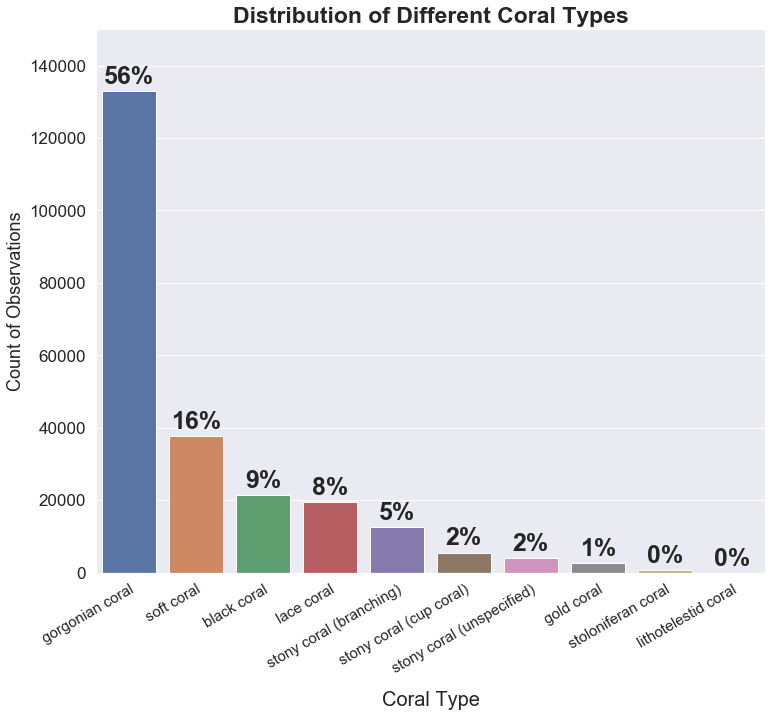

In [21]:
# creating plot
ax = sns.barplot(data = vernac_count, x = vernac_count.index, y = vernac_count['Count of Observations'])
plt.title("Distribution of Different Coral Types", fontweight='bold', fontsize=23)
plt.xticks(rotation = 30, ha = "right", rotation_mode = 'anchor', fontsize = 15)
plt.ylabel('Count of Observations', fontsize = 18)
plt.yticks(fontsize = 17)
plt.ylim(0,150000)
plt.xlabel('Coral Type', fontsize = 20, labelpad = 15)

# adding % value to middle of each column
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height >= 13000:
        ax.text(p.get_x() + p.get_width() / 2, height + 2000,'{0:.0%}'.format((height / total)), fontsize=25, weight='bold', ha = "center") 
    else:
        ax.text(p.get_x() + p.get_width() / 2, height + 2000,'{0:.0%}'.format((height / total)), fontsize=25, weight='bold', ha = "center")

# displaying plot
plt.show()

- Gorgonian corals is the most common (56%)
- Soft corals is the second most common (16%)
- All other corals make up 9% or less of the data

## Q9. Where do the different types of coral come from?

### Q9. Creating map that reflects where the most common types of coral were recorded at
NOTE: Since some corals are much more prevalent than others, using a single map for all of the corals leads to a congested image where its hard to distinguish the less prevalent corals. For this reason I'm creating a separate map for the most prevalent corals.

In [22]:
# separating rows by data provider
gorg_coral = df[df.vernacular_name_category == 'gorgonian coral']
soft_coral = df[df.vernacular_name_category == 'soft coral']
black_coral = df[df.vernacular_name_category == 'black coral']
lace_coral = df[df.vernacular_name_category == 'lace coral']
stony_b_coral = df[df.vernacular_name_category == 'stony coral (branching)']
stony_c_coral = df[df.vernacular_name_category == 'stony coral (cup coral)']
stony_u_coral = df[df.vernacular_name_category == 'stony coral (unspecified)']
gold_coral = df[df.vernacular_name_category == 'gold coral']
stol_coral = df[df.vernacular_name_category == 'stoloniferan coral']

# creating dataframes for geoplot
gorg_coral = df_to_gdf(gorg_coral)
soft_coral = df_to_gdf(soft_coral)
black_coral = df_to_gdf(black_coral)
lace_coral = df_to_gdf(lace_coral)
stony_b_coral = df_to_gdf(stony_b_coral)
stony_c_coral = df_to_gdf(stony_c_coral)
stony_u_coral = df_to_gdf(stony_u_coral)
gold_coral = df_to_gdf(gold_coral)
stol_coral = df_to_gdf(stol_coral)

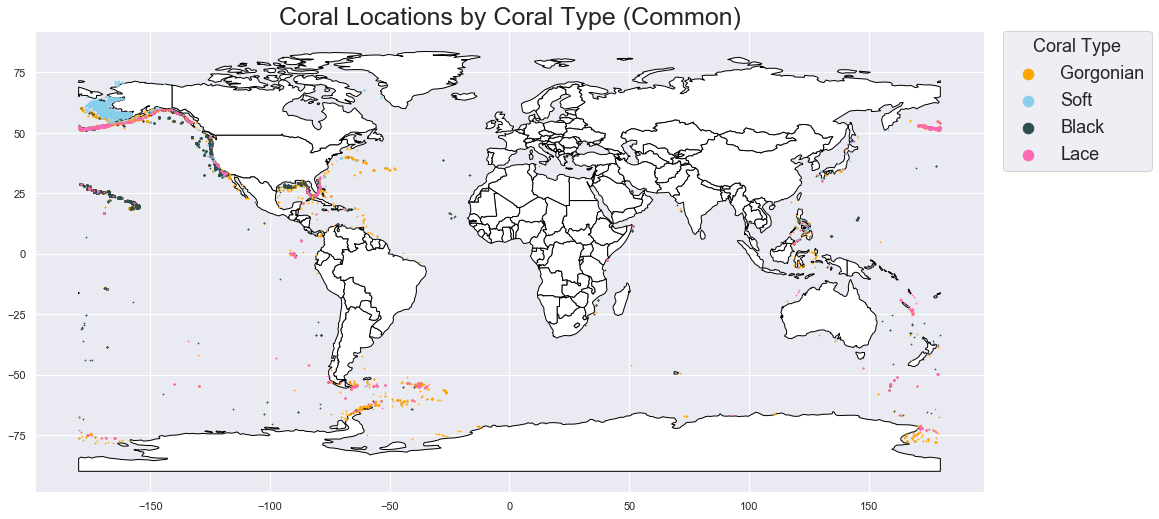

In [57]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (17, 20))

# plotting
gorg_coral.plot(ax = base, marker = 'o', color = 'orange', markersize=0.5)
soft_coral.plot(ax = base, marker = 'o', color = 'skyblue', markersize=0.5)
black_coral.plot(ax = base, marker = 'o', color = 'darkslategrey', markersize=0.5)
lace_coral.plot(ax = base, marker = 'o', color = 'hotpink', markersize=0.5)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labels=['Gorgonian', 'Soft', 'Black', 'Lace'], prop={'size': 18}, markerscale = 15, title = 'Coral Type', title_fontsize = 18)
plt.title('Coral Locations by Coral Type (Common)', fontsize=25)
plt.show()

- <span style="color:orange">Gorgonian corals were found mostly</span>
    - <span style="color:orange">South of Brasil</span>
    - <span style="color:orange">Around Antartica</span>
    - <span style="color:orange">Scattered around the U.S., including Alaska</span>
- <span style="color:#82CAFA">Soft corals are all west of Alaska</span>
- <span style="color:black eel">Black corals are clustered around the U.S. and west/southwest of the U.S.</span>
- <span style="color:blue">Lace corals are mostly near Alaska</span>
    - <span style="color:blue">There are a few clusters near Florida, south of Brasil, and east/southeast of Australia</span>

### Q9. Creating map that reflects where the most uncommon types of coral were recorded at

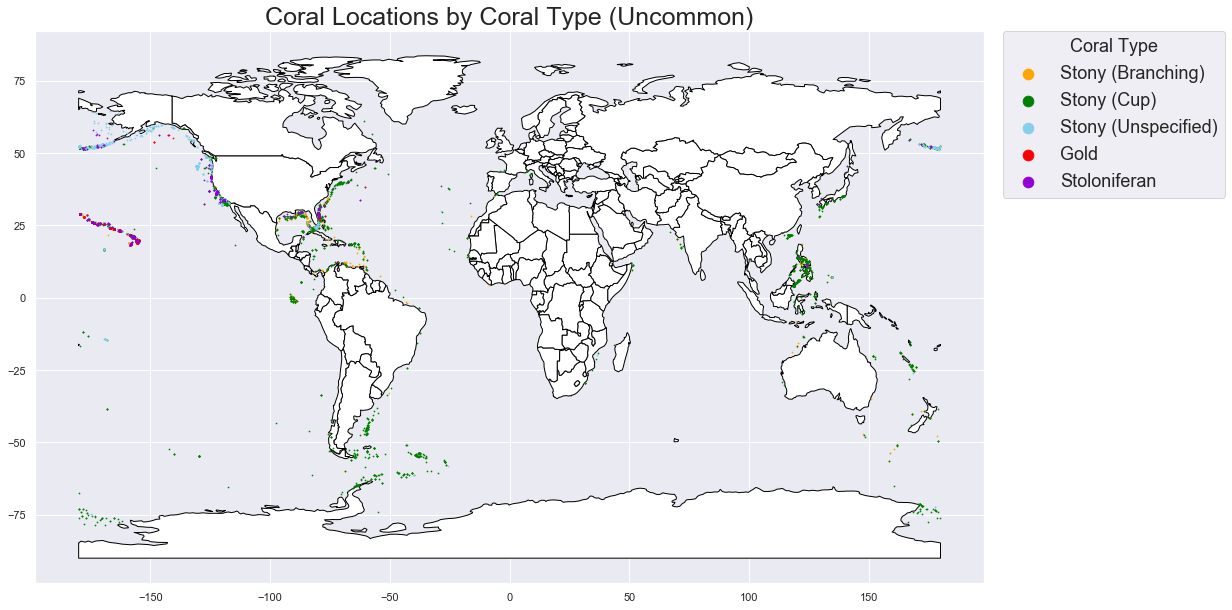

In [58]:
# loading world map
earth_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = earth_map.plot(color='white', edgecolor='black', figsize = (17, 20))

# plotting
stony_b_coral.plot(ax = base, marker = 'o', color = 'orange', markersize=0.5)
stony_c_coral.plot(ax = base, marker = 'o', color = 'green', markersize=0.5)
stony_u_coral.plot(ax = base, marker = 'o', color = 'skyblue', markersize=0.5)
gold_coral.plot(ax = base, marker = 'o', color = 'red', markersize=0.5)
stol_coral.plot(ax = base, marker = 'o', color = 'darkviolet', markersize=0.5)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labels=['Stony (Branching)', 'Stony (Cup)', 'Stony (Unspecified)', 'Gold', 'Stoloniferan'], 
           prop={'size': 18}, markerscale = 15, title = 'Coral Type', title_fontsize = 18)
plt.title('Coral Locations by Coral Type (Uncommon)', fontsize=25)
plt.show()

- <span style="color:orange">Stony Coral (Branching) were mainly near the northern coast of Brasil and near Florida</span>
- <span style="color:green">Stony Coral (Cup) appear in many places, namely</span>
    - <span style="color:green">Along the U.S. coasts</span>
    - <span style="color:green">South of Brasil</span>
    - <span style="color:green">Near Antartica</span>
    - <span style="color:green">Southeast of China</span>
    - <span style="color:green">East of Australia</span>
- <span style="color:#82CAFA">Stony (Unspecified) were mainly found near Alaska and the eastern coast of the U.S.</span>
- <span style="color:red">Gold coral are very uncommon and mainly found near Hawaii</span>
- <span style="color:purple">Stoloniferan are mainly found near Hawaii</span>

## Q10. What was the most common type of sampling equipment used?

In [25]:
equip_count = pd.DataFrame(df.sampling_equipment.value_counts().head())

equip_count['perc'] = round(equip_count / len(df), 2) * 100

equip_count.columns = ['Count of Observations', 'Percent of Total Observations']

equip_count

,Count of Observations,Percent of Total Observations
rov,150620,63.0
submersible,47921,20.0
trawl,15164,6.0
towed camera,13660,6.0
longline,6120,3.0


### Q10. Visualization of most common type of equipment used

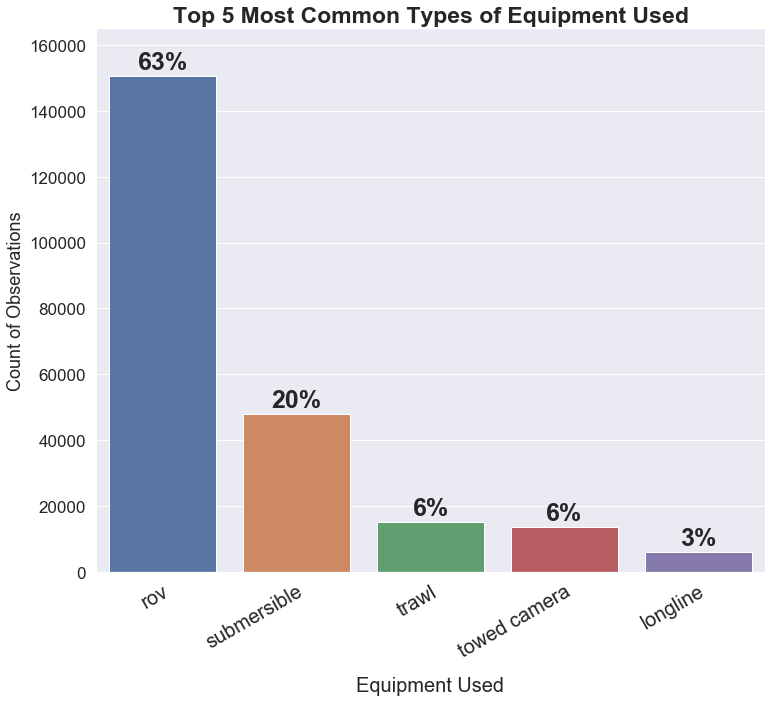

In [26]:
# creating plot
ax = sns.barplot(data = equip_count, x = equip_count.index, y = equip_count['Count of Observations'])
plt.title("Top 5 Most Common Types of Equipment Used", fontweight='bold', fontsize=23)
plt.xticks(rotation = 30, ha = "right", rotation_mode = 'anchor', fontsize = 20)
plt.ylabel('Count of Observations', fontsize = 18)
plt.yticks(fontsize = 17)
plt.ylim(0,165000)
plt.xlabel('Equipment Used', fontsize = 20, labelpad = 15)

# adding % value to middle of each column
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height >= 13000:
        ax.text(p.get_x() + p.get_width() / 2, height + 2000,'{0:.0%}'.format((height / total)), fontsize=25, weight='bold', ha = "center") 
    else:
        ax.text(p.get_x() + p.get_width() / 2, height + 2000,'{0:.0%}'.format((height / total)), fontsize=25, weight='bold', ha = "center")

# displaying plot
plt.show()

- Vast majority (63%) of samples were collected using a ROV (Remotely Operated Vehicle)
- Submersibles were used the second most (20%)
- All other equipment was used in 6% or less of instances

## Q11. What were the most common types of methods used to qualify the data?

In [27]:
qual_method = pd.DataFrame(df.identification_qualifier.value_counts().head(10))

qual_method['perc'] = round(qual_method / len(df), 2) * 100

qual_method.columns = ['Count of Observations', 'Percent of Total Observations']

qual_method

,Count of Observations,Percent of Total Observations
id from video,73462,31.0
id by expert from video,59213,25.0
id by expert from image,26624,11.0
field id by non-expert from video,23586,10.0
id by expert from still images,12828,5.0
field id by non-expert from trawl survey bycatch specimen,10025,4.0
good - id from video,7887,3.0
id by non-expert from sample,6117,3.0
morphological id by taxonomic expert,4642,2.0
field id,3704,2.0


### Q11. Visualization of most common qualification methods

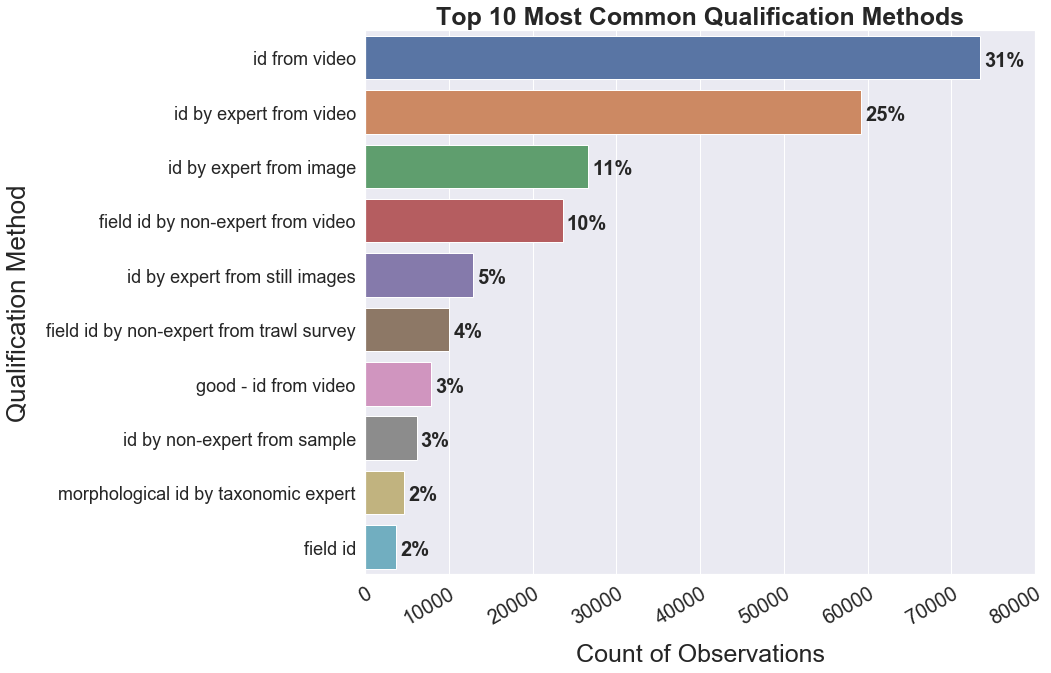

In [28]:
# copying df to avoid altering original
qual_method_copy = qual_method.copy()

# shortening long index value
qual_method_copy.index.values[5] = 'field id by non-expert from trawl survey'

# creating plot
ax = sns.barplot(data = qual_method_copy, y = qual_method_copy.index, x = qual_method_copy['Count of Observations'])
plt.title("Top 10 Most Common Qualification Methods", fontweight='bold', fontsize = 25)
plt.xticks(rotation = 30, ha = "right", rotation_mode = 'anchor', fontsize = 20)
plt.yticks(fontsize = 18)
plt.xlabel('Count of Observations', fontsize = 25, labelpad = 15)
plt.xlim(0,80000)
plt.ylabel('Qualification Method', fontsize = 26, labelpad = 15)

# adding % value to middle of each column
total = len(df)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    ax.text(width + 500,
            p.get_y() + .55,
            '{0:.0%}'.format((width / total)), fontsize = 20, weight='bold') 

# displaying plot
plt.show()

- Videos and images appear are in the most common identification qualifiers
- I'd like to know how much of the data was qualified using these methods

## Q12. How much data was qualified using video, images and other methods?

In [29]:
# copying df to avoid altering original
df_copy = df.copy()

# adding column that specifies whether observatino was qualified using video, image, or an alternate method
df_copy['gen_qual_method'] = np.where((df_copy.identification_qualifier.str.contains('photo')) | (df_copy.identification_qualifier.str.contains('image')), 'image', None)
df_copy['gen_qual_method'] = np.where(df_copy.identification_qualifier.str.contains('video'), 'video', df_copy.gen_qual_method)
df_copy['gen_qual_method'] = np.where(df_copy.gen_qual_method.isnull(), 'other', df_copy.gen_qual_method)

gen_qual_method_df = pd.DataFrame(df_copy.gen_qual_method.value_counts())

gen_qual_method_df['perc'] = round(gen_qual_method_df / len(df), 2) * 100

gen_qual_method_df.columns = ['Count of Observations', 'Percent of Total Observations']

gen_qual_method_df

,Count of Observations,Percent of Total Observations
video,167221,70.0
image,41204,17.0
other,28810,12.0


### Q12. Creating visualization of general qualification methods (video, image, other)

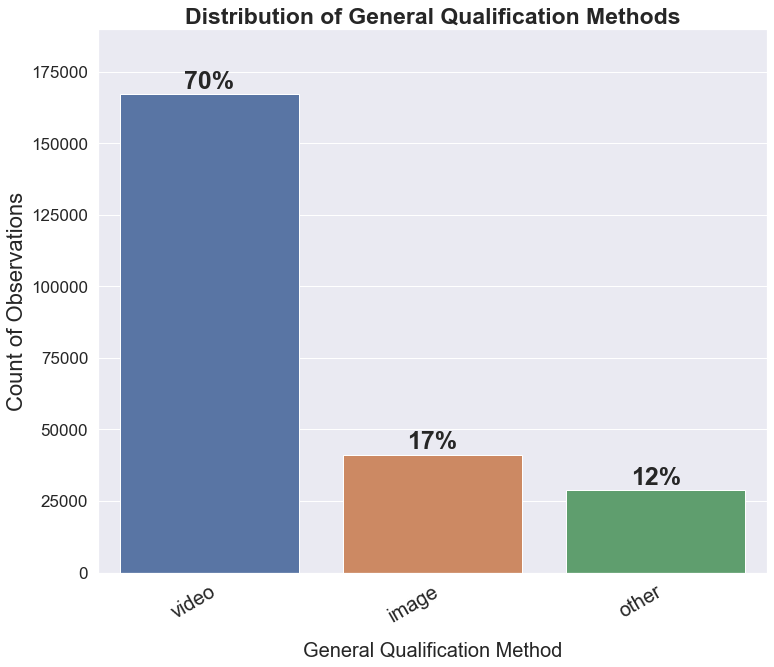

In [30]:
# creating plot
ax = sns.barplot(data = gen_qual_method_df, x = gen_qual_method_df.index, y = gen_qual_method_df['Count of Observations'])
plt.title("Distribution of General Qualification Methods", fontweight='bold', fontsize=23)
plt.xticks(rotation = 30, ha = "right", rotation_mode = 'anchor', fontsize = 20)
plt.ylabel('Count of Observations', fontsize = 22)
plt.yticks(fontsize = 17)
plt.ylim(0,190000)
plt.xlabel('General Qualification Method', fontsize = 20, labelpad = 15)

# adding % value to middle of each column
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 2000,'{0:.0%}'.format((height / total)), fontsize=25, weight='bold', ha = "center") 
# displaying plot
plt.show()

- Videos qualified 70% of observations
- Images qualified 17% of observations
- Other methods qualified 12% of observations
- Combined, roughly 87% of the data was was qualified with either images or videos